# **Classificação**

Um problema de classificação em Machine Learning (ML) se refere a prever categorias ou classes aos quais uma observação do conjunto de dados pertence, com base em padrões identificados nos dados de treinamento.

Exemplos:
- Classificar se um e-mail é spam ou não
- Classificar se um câncer é maligno ou benigno
- Prever o risco de crédito  (default) de um cliente
- Prever o churn
- Prever a proabilidade de um paciente ter um ataque cardíaco ou não
- Detectar transações fraudalentas (conta bancária / cartão de crédito)
- Reconhecimento de imagens
- Prever se um colaborador vai deixar a empresa ou não (turnover)

## **Regressão Logística**

A regressão logística é um método estatístico utilizado para modelar a probabilidade de ocorrência de um evento binário (resultado de duas categorias) em função de uma ou mais variáveis independentes contínuas ou categóricas.

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/logit-function.png?raw=true" width="600px"/>

Fonte: [(BITTENCOURT, 2012)](https://www.researchgate.net/publication/277818863_Regressao_logistica_politomica_revisao_teorica_e_aplicacoes)

<br>

Tem como base a função logito (sigmoide), retornando valores no intervalo de [0, 1]. A equação básica da regressão logística é a seguinte:

\begin{equation}
  logit (p) = ln \left(\frac{p} {1-p} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
\end{equation}

Onde:
- $p$: probabilidade do evento acontecer (por exemplo, a pessoa comprar um produto)
- $logit(p)$: é o logaritmo da razão de chances (odds ratio) de  𝑝
- $\beta_0$: intercepto (coeficiente)
- $\beta_i$: coeficientes das variáveis independentes

In [4]:
# -- Manipulação:
import numpy as np
import pandas as pd

# -- Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

# -- Modelagem:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [5]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/customer_churn.csv' -O 'customer_churn.csv'

In [6]:
churn = pd.read_csv('customer_churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dicionário de dados**


| Field                             | Description                                                                                                                                                                                                                  |
|-----------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| CustomerID                        | A unique ID that identifies each customer                                                                                                                                                                                    |
| Gender                            | The customer’s gender: Male, Female                                                                                                                                                                                          |
| Age                               | The customer’s current age, in years, at the time the fiscal quarter   ended (Q2 2022)                                                                                                                                       |
| Married                           | Indicates if the customer is married: Yes, No                                                                                                                                                                                |
| Number of Dependents              | Indicates the number of dependents that live with the customer   (dependents could be children, parents, grandparents, etc.)                                                                                                 |
| City                              | The city of the customer’s primary residence in California                                                                                                                                                                   |
| Zip Code                          | The zip code of the customer’s primary residence                                                                                                                                                                             |
| Latitude                          | The latitude of the customer’s primary residence                                                                                                                                                                             |
| Longitude                         | The longitude of the customer’s primary residence                                                                                                                                                                            |
| Number of Referrals               | Indicates the number of times the customer has referred a friend or   family member to this company to date                                                                                                                  |
| Tenure in Months                  | Indicates the total amount of months that the customer has been with the   company by the end of the quarter specified above                                                                                                 |
| Offer                             | Identifies the last marketing offer that the customer accepted: None,   Offer A, Offer B, Offer C, Offer D, Offer E                                                                                                          |
| Phone Service                     | Indicates if the customer subscribes to home phone service with the   company: Yes, No                                                                                                                                       |
| Avg Monthly Long Distance Charges | Indicates the customer’s average long distance charges, calculated to the   end of the quarter specified above (if the customer is not subscribed to home   phone service, this will be 0)                                   |
| Multiple Lines                    | Indicates if the customer subscribes to multiple telephone lines with the   company: Yes, No (if the customer is not subscribed to home phone service,   this will be No)                                                    |
| Internet Service                  | Indicates if the customer subscribes to Internet service with the   company: Yes, No                                                                                                                                         |
| Internet Type                     | Indicates the customer's type of internet connection: DSL, Fiber Optic,   Cable (if the customer is not subscribed to internet service, this will be   None)                                                                 |
| Avg Monthly GB Download           | Indicates the customer’s average download volume in gigabytes, calculated   to the end of the quarter specified above (if the customer is not subscribed   to internet service, this will be 0)                              |
| Online Security                   | Indicates if the customer subscribes to an additional online security   service provided by the company: Yes, No (if the customer is not subscribed   to internet service, this will be No)                                  |
| Online Backup                     | Indicates if the customer subscribes to an additional online backup   service provided by the company: Yes, No (if the customer is not subscribed   to internet service, this will be No)                                    |
| Device Protection Plan            | Indicates if the customer subscribes to an additional device protection   plan for their Internet equipment provided by the company: Yes, No (if the   customer is not subscribed to internet service, this will be No)      |
| Premium Tech Support              | Indicates if the customer subscribes to an additional technical support   plan from the company with reduced wait times: Yes, No (if the customer is   not subscribed to internet service, this will be No)                  |
| Streaming TV                      | Indicates if the customer uses their Internet service to stream   television programing from a third party provider at no additional fee: Yes,   No (if the customer is not subscribed to internet service, this will be No) |
| Streaming Movies                  | Indicates if the customer uses their Internet service to stream movies   from a third party provider at no additional fee: Yes, No (if the customer is   not subscribed to internet service, this will be No)                |
| Streaming Music                   | Indicates if the customer uses their Internet service to stream music   from a third party provider at no additional fee: Yes, No (if the customer is   not subscribed to internet service, this will be No)                 |
| Unlimited Data                    | Indicates if the customer has paid an additional monthly fee to have   unlimited data downloads/uploads: Yes, No (if the customer is not subscribed   to internet service, this will be No)                                  |
| Contract                          | Indicates the customer’s current contract type: Month-to-Month, One Year,   Two Year                                                                                                                                         |
| Paperless Billing                 | Indicates if the customer has chosen paperless billing: Yes, No                                                                                                                                                              |
| Payment Method                    | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card,   Mailed Check                                                                                                                                     |
| Monthly Charge                    | Indicates the customer’s current total monthly charge for all their   services from the company                                                                                                                              |
| Total Charges                     | Indicates the customer’s total charges, calculated to the end of the   quarter specified above                                                                                                                               |
| Total Refunds                     | Indicates the customer’s total refunds, calculated to the end of the   quarter specified above                                                                                                                               |
| Total Extra Data Charges          | Indicates the customer’s total charges for extra data downloads above   those specified in their plan, by the end of the quarter specified above                                                                             |
| Total Long Distance Charges       | Indicates the customer’s total charges for long distance above those   specified in their plan, by the end of the quarter specified above                                                                                    |
| Total Revenue                     | Indicates the company's total revenue from this customer, calculated to   the end of the quarter specified above (Total Charges - Total Refurnds +   Total Extra Data Charges + Total Lond Distance Charges)                 |
| Customer Status                   | Indicates the status of the customer at the end of the quarter: Churned,   Stayed, or Joined                                                                                                                                 |
| Churn Category                    | A high-level category for the customer’s reason for churning, which is   asked when they leave the company: Attitude, Competitor, Dissatisfaction,   Other, Price (directly related to Churn Reason)                         |
| Churn Reason                      | A customer’s specific reason for leaving the company, which is asked when   they leave the company (directly related to Churn Category)                                                                                      |
| Zip Code                          | The zip code of the customer’s primary residence                                                                                                                                                                             |
| Population                        | A current population estimate for the entire Zip Code area                                                                                                                                                                   |

In [7]:
churn.shape

(7043, 21)

In [8]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
churn = churn[[
    'Partner', 'Dependents','tenure', 'TechSupport',
    'Contract', 'PaymentMethod', 'MonthlyCharges',
    'TotalCharges', 'Churn'
]]
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Partner         7043 non-null   object 
 1   Dependents      7043 non-null   object 
 2   tenure          7043 non-null   int64  
 3   TechSupport     7043 non-null   object 
 4   Contract        7043 non-null   object 
 5   PaymentMethod   7043 non-null   object 
 6   MonthlyCharges  7043 non-null   float64
 7   TotalCharges    7043 non-null   object 
 8   Churn           7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [10]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [11]:
churn.isna().sum()

Partner            0
Dependents         0
tenure             0
TechSupport        0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [12]:
churn.groupby('Churn')[['Churn']].value_counts() / len(churn) * 100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [13]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def resample_data(df, target_column, method='undersample', random_state=42):
    """
    Resamples the DataFrame using the specified method.

    Parameters:
    - df: DataFrame containing the data
    - target_column: Column name of the target variable
    - method: Resampling method ('undersample' or 'oversample')
    - random_state: Seed for reproducibility

    Returns:
    - resampled DataFrame
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    if method == 'undersample':
        sampler = RandomUnderSampler(random_state=random_state)
    elif method == 'oversample':
        sampler = RandomOverSampler(random_state=random_state)
    else:
        raise ValueError("Method must be 'undersample' or 'oversample'")

    X_res, y_res = sampler.fit_resample(X, y)
    print(f"New class distribution: {Counter(y_res)}")

    resampled_df = pd.DataFrame(X_res, columns=X.columns)
    resampled_df[target_column] = y_res.values

    return resampled_df

# Supondo que 'churn' seja o seu DataFrame original
# Para undersampling
churn_undersampled = resample_data(churn, target_column='Churn', method='undersample')

# Para oversampling
churn_oversampled = resample_data(churn, target_column='Churn', method='oversample')

New class distribution: Counter({'No': 1869, 'Yes': 1869})
New class distribution: Counter({'No': 5174, 'Yes': 5174})


In [14]:
churn.groupby('Churn')[['Churn']].value_counts() / len(churn) * 100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [15]:
churn_undersampled

,Partner,Dependents,tenure,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,1,No internet service,Month-to-month,Mailed check,20.15,20.15,No
1,No,No,72,No internet service,Two year,Bank transfer (automatic),19.30,1414.80,No
2,No,Yes,7,No,Month-to-month,Mailed check,45.75,344.20,No
3,Yes,No,48,No internet service,Two year,Mailed check,20.05,1036.00,No
4,No,No,13,No,Month-to-month,Mailed check,70.15,886.70,No
...,...,...,...,...,...,...,...,...,...
3733,No,No,12,Yes,One year,Electronic check,59.80,727.80,Yes
3734,No,No,9,No,Month-to-month,Bank transfer (automatic),44.20,403.35,Yes
3735,No,No,1,No,Month-to-month,Electronic check,75.75,75.75,Yes
3736,No,No,67,No,Month-to-month,Credit card (automatic),102.95,6886.25,Yes


In [16]:
# Verificar a nova distribuição de classes no DataFrame undersampled
churn_undersampled['Churn'].value_counts(normalize=True) * 100

Churn
No     50.0
Yes    50.0
Name: proportion, dtype: float64

In [17]:
# Verificar a nova distribuição de classes no DataFrame oversampled
churn_oversampled['Churn'].value_counts(normalize=True) * 100

Churn
No     50.0
Yes    50.0
Name: proportion, dtype: float64

### **Desbalanceamento**

> **Undersampling**: reduz o número de instâncias na classe majoritária para equilibrar a distribuição das classes. Desvantagem: perda de informação.

> **Oversampling**:  duplica aleatoriamente instâncias da classe minoritária até que o número de instâncias dessa classe se iguale ao da classe majoritária. Desvantagem: pode tender ao *overfitting*.

- Base estatística: amostragem aleatória.

- Artigo: [Towards Data Science - **Oversampling and Undersampling: a technique for Imbalanced Classification**](https://medium.com/p/5e2bbaf56dcf)

> Exemplo de função no Python:

```python
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def resample_data(df, target_column, method='undersample', random_state=42):
    """
    Resamples the DataFrame using the specified method.
    
    Parameters:
    - df: DataFrame containing the data
    - target_column: Column name of the target variable
    - method: Resampling method ('undersample' or 'oversample')
    - random_state: Seed for reproducibility
    
    Returns:
    - resampled DataFrame
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    if method == 'undersample':
        sampler = RandomUnderSampler(random_state=random_state)
    elif method == 'oversample':
        sampler = RandomOverSampler(random_state=random_state)
    else:
        raise ValueError("Method must be 'undersample' or 'oversample'")
    
    X_res, y_res = sampler.fit_resample(X, y)
    print(f"New class distribution: {Counter(y_res)}")
    
    resampled_df = pd.DataFrame(X_res, columns=X.columns)
    resampled_df[target_column] = y_res.values
    
    return resampled_df

# Usos:
# Para undersampling
churn_undersampled = resample_data(churn, target_column='Churn', method='undersample')

# Para oversampling
churn_oversampled = resample_data(churn, target_column='Churn', method='oversample')
```

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def resample_data(df, target_column, method='undersample', random_state=35):
    """
    Resamples the DataFrame using the specified method.

    Parameters:
    - df: DataFrame containing the data
    - target_column: Column name of the target variable
    - method: Resampling method ('undersample' or 'oversample')
    - random_state: Seed for reproducibility

    Returns:
    - resampled DataFrame
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    if method == 'undersample':
        sampler = RandomUnderSampler(random_state=random_state)
    elif method == 'oversample':
        sampler = RandomOverSampler(random_state=random_state)
    else:
        raise ValueError("Method must be 'undersample' or 'oversample'")

    X_res, y_res = sampler.fit_resample(X, y)
    print(f"New class distribution: {Counter(y_res)}")

    resampled_df = pd.DataFrame(X_res, columns=X.columns)
    resampled_df[target_column] = y_res.values

    return resampled_df

# Aplicando undersampling:
churn = resample_data(churn, target_column='Churn', method='undersample', random_state=35)
churn.head()

New class distribution: Counter({'No': 1869, 'Yes': 1869})


,Partner,Dependents,tenure,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,30,Yes,Two year,Credit card (automatic),69.10,2093.90,No
1,No,No,27,No internet service,One year,Mailed check,20.30,595.05,No
2,Yes,Yes,13,No internet service,Two year,Mailed check,19.55,265.30,No
3,Yes,Yes,35,No internet service,Two year,Bank transfer (automatic),20.50,759.35,No
4,Yes,Yes,54,Yes,Two year,Credit card (automatic),65.65,3566.70,No


In [19]:
churn.groupby('Churn')[['Churn']].value_counts() / len (churn) * 100

Churn
No     50.0
Yes    50.0
Name: count, dtype: float64

In [20]:
churn_raw = churn.copy()

### **Encoding**

In [21]:
churn['TechSupport'] = churn['TechSupport'].replace('Yes', 1).replace('No', 0).replace('No internet service', 3)
churn['Partner'] = churn['Partner'].replace('Yes', 1).replace('No', 0)
churn['Dependents'] = churn['Dependents'].replace('Yes', 1).replace('No', 0)

In [22]:
churn['Contract'].unique()

array(['Two year', 'One year', 'Month-to-month'], dtype=object)

In [23]:
churn['Contract'] = churn['Contract'].replace('Month-to-month', 0).replace('One year', 1).replace('Two year', 2)

In [24]:
churn['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Mailed check',
       'Bank transfer (automatic)', 'Electronic check'], dtype=object)

In [25]:
churn['PaymentMethod'] = churn['PaymentMethod'].replace('Mailed check', 0)\
  .replace('Electronic check', 1).replace('Bank transfer (automatic)', 2)\
  .replace('Credit card (automatic)', 3)

In [26]:
churn['Churn'] = churn['Churn'].replace('No', 0).replace('Yes', 1)
churn['Churn'] = churn['Churn'].astype('int64')

<ipython-input-27-65ba60e867aa>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1);


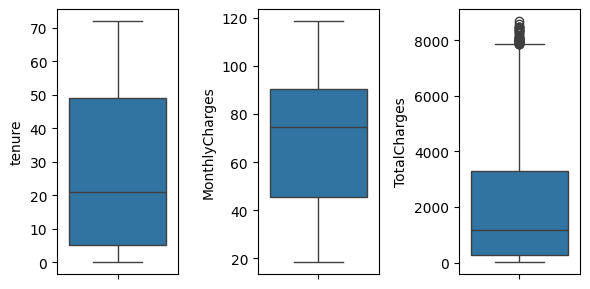

In [27]:
fig, ax = plt.subplots(figsize=(6,3))
plt.subplot(1, 3, 1);
sns.boxplot(data=churn, y='tenure')
plt.subplot(1, 3, 2);
sns.boxplot(data=churn, y='MonthlyCharges')
plt.subplot(1, 3, 3);
sns.boxplot(data=churn, y='TotalCharges')
plt.tight_layout()

### **Normalização**

In [28]:
churn['tenure'] = churn['tenure'].apply(lambda x: (x - churn['tenure'].mean()) / churn['tenure'].std() )
churn['MonthlyCharges'] = churn['MonthlyCharges'].apply(lambda x: (x - churn['MonthlyCharges'].mean()) / churn['MonthlyCharges'].std() )
churn['TotalCharges'] = churn['TotalCharges'].apply(lambda x: (x - churn['TotalCharges'].mean()) / churn['TotalCharges'].std() )
churn.head(2)

,Partner,Dependents,tenure,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0.089629,1,2,3,0.043410,0.019207,0
1,0,0,-0.034672,3,1,0,-1.651597,-0.666173,0


### **Modelagem**

In [29]:
# Nulos:
churn.dropna(axis=0, inplace=True)

# Dividir os dados em variáveis independentes (X) e dependentes (Y)
array = churn.values
x= array[:, 0:8]    # colunas 0-7
y = array[:, -1]     # target (última coluna)

# Dividir os dados em conjuntos de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=35)

# Treinar o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

# Fazer previsões nos conjuntos de treino e teste
ypred_treino = modelo.predict(x_treino)
ypred_teste = modelo.predict(x_teste)

# Medir a acurácia nos conjuntos de treino e teste
resultado_treino = accuracy_score(y_treino, ypred_treino)
resultado_teste = accuracy_score(y_teste, ypred_teste)

print(f'Acurácia do modelo no conjunto de treino: {round(resultado_treino * 100, 1)} %')
print(f'Acurácia do modelo no conjunto de teste: {round(resultado_teste * 100, 1)} %')

Acurácia do modelo no conjunto de treino: 75.8 %
Acurácia do modelo no conjunto de teste: 74.4 %


In [30]:
# Predição e proabaibilidade
prediction = modelo.predict(x_teste[50].reshape(1, -1))
probability = modelo.predict_proba(x_teste[50].reshape(1, -1))

if prediction == 0:
  print('Não vai dar churn')
else:
  print('Churn')
print(probability)

Não vai dar churn
[[0.61556574 0.38443426]]


### **Validação**

> **Matriz de confusão**

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/confusion-matrix.png?raw=true" width="100%"/>



- Matriz de confusão permite obter as seguintes métricas:
\begin{array}{ll}
\textrm{Acurácia} &= \frac{VP + VN}{VP + VN + FP + FN} \\
\textrm{Precisão} &= \frac{VP}{VP + FP} \\
\textrm{Recall} &= \frac{VP}{VP + FN} \\
\textrm{Especificidade} &= \frac{VN}{VN + FP} \\
\textrm{F1 score} &= 2 \times \frac{\textrm{Precisão} \times \textrm{Recall}}{\textrm{Precisão} + \textrm{Recall}}
\end{array}

Onde:

> **Acurácia:** é a proporção de previsões corretas que um modelo faz em relação ao total de previsões. É uma medida geral de quão bem um modelo está performando em todos os tipos de exemplos.

> **Precisão:** é a proporção de exemplos positivos identificados corretamente pelo modelo em relação a todos os exemplos que o modelo classificou como positivos. É útil para entender a confiabilidade das previsões positivas.

> **Recall (Sensibilidade):** é a proporção de exemplos positivos identificados corretamente pelo modelo em relação a todos os exemplos que são realmente positivos. É útil para medir a capacidade do modelo em encontrar todos os exemplos positivos.

> **Especificidade:** A especificidade é a proporção de exemplos negativos identificados corretamente pelo modelo em relação a todos os exemplos que são realmente negativos. É útil para medir a capacidade do modelo em evitar falsos positivos em uma classe específica.

> **F1 score:** O F1 score é uma média harmônica da precisão e do recall. Ele fornece uma única métrica que equilibra precisão e recall, sendo útil quando há um desequilíbrio entre as classes de interesse, ajudando a avaliar o desempenho geral do modelo de forma mais balanceada. Um F1 score mais alto indica um melhor equilíbrio entre precisão e recall.


* Além disso, é possível estimar o retorno de um modelo de classificação pela matriz de confusão (e.g., comparar dois modelos diferentes e o retorno para o negócio): [**Extracting value from the confusion-matrix**](https://medium.com/@vo.freelancer5/extracting-value-from-the-confusion-matrix-21ec737fad20).

In [31]:
# Relatório de classificação para o conjunto de teste
print("Relatório de classificação para o conjunto de teste:")
print(classification_report(y_teste, ypred_teste))

# Matriz de confusão para o conjunto de teste
print("Matriz de confusão para o conjunto de teste:")
print(confusion_matrix(y_teste, ypred_teste))

Relatório de classificação para o conjunto de teste:
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73       563
         1.0       0.71      0.81      0.76       557

    accuracy                           0.74      1120
   macro avg       0.75      0.74      0.74      1120
weighted avg       0.75      0.74      0.74      1120

Matriz de confusão para o conjunto de teste:
[[382 181]
 [106 451]]


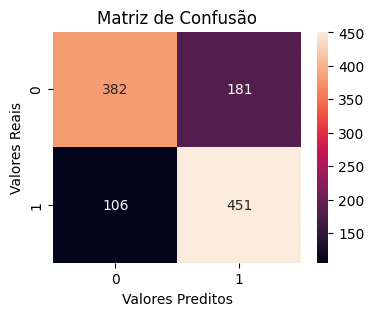

In [32]:
# Visualizando a matriz  de confusão
matriz = confusion_matrix(y_teste, ypred_teste)
plt.figure(figsize=(4,3))
sns.heatmap(matriz,annot=True,fmt='d')
plt.xlabel('Valores Preditos');
plt.ylabel('Valores Reais');
plt.title('Matriz de Confusão');

#### **Curva ROC e AUC**

> **Curva ROC (Receiving Operating Characteristics):**

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/ROC-AUC.png?raw=true" width="500px"/>

- Valores no intervalo de [0, 1]
- Valores ideais: próximos de 1



> **Área sob a curva (AUC)**: quantifica a habilidade de um modelo de classificação em distinguir entre as classes.

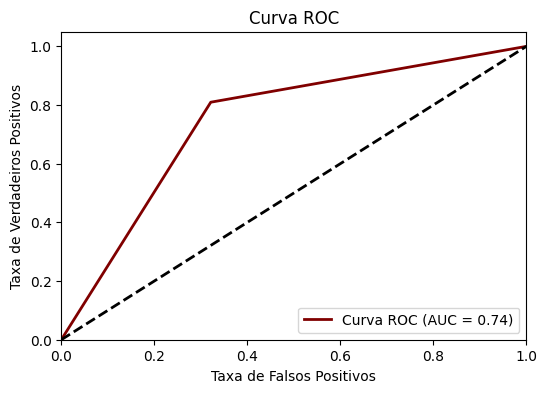

In [33]:
# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_teste, ypred_teste)
roc_auc = roc_auc_score(y_teste, ypred_teste)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr, tpr, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## **Naive-Bayes**

- Problemas de classificação binária ou multi-classes
- **Base:** Teorema de Bayes
- Pressuposto: independência das variáveis
- Robusto a *outliers*
- Valores null não impedem a classificação (estimador de LaPlace)
- Atributos correlacionados $\rightarrow$ interfere no desempenho
- Interessante para amostras pequenas
- Classifica de acordo com a classe mais provável
- Equação:

\begin{equation}
P (y_i | x) = \frac{ P(x|y_i) P(y_i) }{ P(x) }
\end{equation}

Onde:
- $P (y_i | x)$, $P(x|y_i)$: probabilidade a posteriori
- $P (y_i)$, $P(x)$: probabilidade a priori
- $P(A/B)$: probabilidade condicional de A com B (verossimilhança/likelihood)

> No Python:

```python
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar o conjunto de dados Iris
x = dados.drop('target', axis=1)
y = dados['target']

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Treinar o modelo Gaussian Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)
```


In [34]:
from sklearn.naive_bayes import GaussianNB

array = churn.values
x = array[:, 0:8]    # colunas 0-7
y = array[:, -1]     # target (última coluna)

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Treinar o modelo Gaussian Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)

# Fazer previsões nos conjuntos de treino e teste
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Medir a acurácia nos conjuntos de treino e teste
train_accuracy = round(accuracy_score(y_train, y_train_pred), 1)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 1)

print(f'Acurácia no conjunto de treino: {train_accuracy}%')
print(f'Acurácia no conjunto de teste: {test_accuracy}%')

# Relatório de classificação para o conjunto de teste
print("\nRelatório de classificação para o conjunto de teste:")
print(classification_report(y_test, y_test_pred))

# Matriz de confusão para o conjunto de teste
print("Matriz de confusão para o conjunto de teste:")
print(confusion_matrix(y_test, y_test_pred))

Acurácia no conjunto de treino: 0.7%
Acurácia no conjunto de teste: 0.7%

Relatório de classificação para o conjunto de teste:
              precision    recall  f1-score   support

         0.0       0.79      0.65      0.71       583
         1.0       0.68      0.81      0.74       537

    accuracy                           0.73      1120
   macro avg       0.73      0.73      0.73      1120
weighted avg       0.74      0.73      0.72      1120

Matriz de confusão para o conjunto de teste:
[[378 205]
 [102 435]]


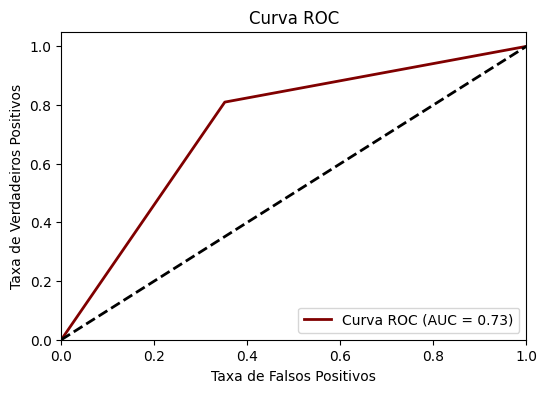

In [35]:
# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr, tpr, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

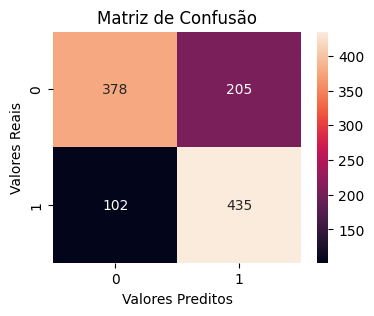

In [36]:
# Visualizando a matriz  de confusão
matriz_NB = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_NB,annot=True,fmt='d')
plt.xlabel('Valores Preditos');
plt.ylabel('Valores Reais');
plt.title('Matriz de Confusão');

## **Decision Tree**

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/decision-tree-example.png?raw=true" width="80%"/>

Fonte: [Interpretable AI: Decision Trees](https://medium.com/@shrutimisra/interpretable-ai-decision-trees-f9698e94ef9b)


- Nós (raíz, pai, filho): teste/decisão
- Folhas
- Ao final de um conjunto de testes e regras, tem-se as decisões finais ou classes.
- Objetivo é maximizar o ganho de informação (IG) e minimizar a Entropia (E)
- Problemas classificação binária ou multi-classe.
- Também pode ser usado para regressão, assim como KNN, e Random Forests.
- Desvantagem: sensibilidade aos dados de treino.

> **Entropia:**

\begin{equation}
  E = \sum -p_i \cdot log(p_i)
\end{equation}

Onde:
- $p_i$: probabilidade (classe i)

<br>

> **Ganho de informação:**

\begin{equation}
  IG = E_{pai} - \sum w_i \ E_{filho \ i }
\end{equation}

Onde:
- $E$: entropia
- $w_i$ peso do i-ésimo nó filho, calculado como a proporção do número de amostras no i-ésimo nó filho em relação ao número total de amostras no nó pai.

> No Python

``` python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()

# treino/teste:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=35
)

# modelagem:
modelo = modelo.fit(features_train, target_train)

# resumo
modelo.__dict__

# predições
features = np.array([...])
prediction = modelo.predict(features.reshape(1, -1))
prediction
```

> Visualizando a árvore:

```python
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(modelo, out_file=None)
graph = graphviz.Source(tree_data)
graph
```  

### **Modelagem**

In [37]:
from sklearn.tree import DecisionTreeClassifier

# instanciando o modelo DT:
model_DT = DecisionTreeClassifier(criterion='entropy')

# treino/teste:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=35
)

# modelagem:
model_DT = model_DT.fit(x_train, y_train)

# resumo
model_DT.__dict__

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 8,
 'n_outputs_': 1,
 'classes_': array([0., 1.]),
 'n_classes_': 2,
 'max_features_': 8,
 'tree_': <sklearn.tree._tree.Tree at 0x7b2e63a5ded0>}

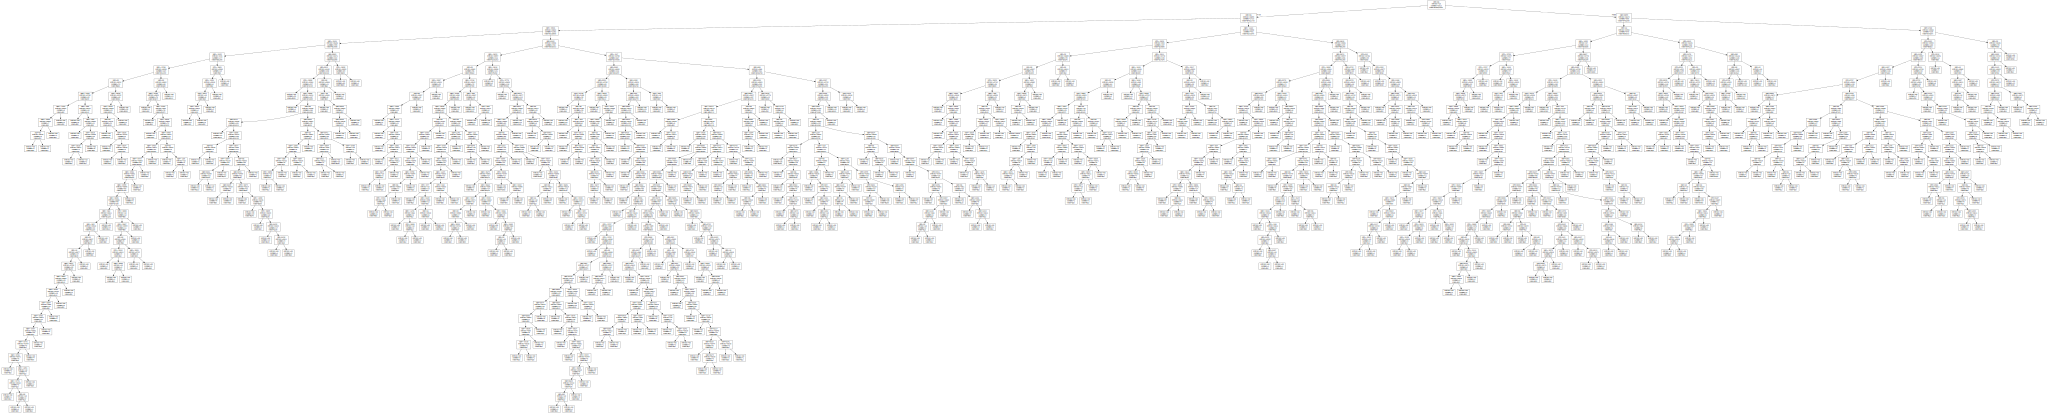

In [38]:
# Visualizando a árvore:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model_DT, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [39]:
# predições
tenure = 10
monthly_charges = 15
total_charges= 150

# Cálculo da padronização:
tenure_std = (tenure - churn_raw['tenure'].mean()) / churn_raw['tenure'].std()
monthly_charges_std = (monthly_charges - churn_raw['MonthlyCharges'].mean()) / churn_raw['MonthlyCharges'].std()
total_charges_std = (total_charges - churn_raw['TotalCharges'].mean()) / churn_raw['TotalCharges'].std()

# Criação do array new_customer:
# partner, dependentes, tenure, suporte técnico, contrato, pagto, cobranças mensais, cobranças totais
new_customer = np.array([1,1, tenure_std, 1, 0, 2, monthly_charges_std, total_charges_std], dtype=float)

#predição:
prediction_DT = model_DT.predict(new_customer.reshape(1, -1))
#probabilidade:
prediction_prob_DT = model_DT.predict_proba(new_customer.reshape(1, -1))

if prediction_DT[0] == 0:
  print('Cliente ativo')
else :
  print('Churn')

Cliente ativo


## **Random Forest**

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/RF.png?raw=true" width="60%"/>

- Várias DT.
- Problemas classificação binária ou multi-classe.
- Princípios: Bootstrapping (diferentes dados para cada árvore) e Feature Selection (diminui correlação entre as árvores)
- Features: $\sqrt{N_{cols}}$ ou $log_n (N_{cols})$
- Corrige sensibilidade aos dados de treino, encontrado nas DT.


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model_RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
model_RF.fit(x_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_RF = model_RF.predict(x_test)

# Avaliando a acurácia do modelo
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f'Acurácia do modelo: {accuracy_RF}')

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred_RF))

Acurácia do modelo: 0.7321428571428571
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       583
         1.0       0.70      0.76      0.73       537

    accuracy                           0.73      1120
   macro avg       0.73      0.73      0.73      1120
weighted avg       0.73      0.73      0.73      1120

